In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import statistics as stat
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

In [2]:
data = pd.read_pickle('orig_data.pickle')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3258796 entries, 0 to 3818003
Data columns (total 19 columns):
 #   Column             Dtype         
---  ------             -----         
 0   trip_id            int64         
 1   start_time         datetime64[ns]
 2   month              object        
 3   month_numb         int64         
 4   day_of_week        object        
 5   hour               int64         
 6   quarter            int64         
 7   Season             object        
 8   end_time           datetime64[ns]
 9   bikeid             int64         
 10  tripduration       int64         
 11  from_station_id    int64         
 12  from_station_name  object        
 13  to_station_id      int64         
 14  to_station_name    object        
 15  usertype           object        
 16  gender             object        
 17  birthyear          Int64         
 18  birthyear_bins     category      
dtypes: Int64(1), category(1), datetime64[ns](2), int64(8), object(7

In [3]:
data.head(2)

,trip_id,start_time,month,month_numb,day_of_week,hour,quarter,Season,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,birthyear_bins
0,21742443,2019-01-01 00:04:37,January,1,Tuesday,0,1,Winter,2019-01-01 00:11:07,2167,39,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989,young
1,21742444,2019-01-01 00:08:13,January,1,Tuesday,0,1,Winter,2019-01-01 00:15:34,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990,young


In [4]:
data['start_date'] = pd.to_datetime(data['start_time']).dt.date
data.head()

,trip_id,start_time,month,month_numb,day_of_week,hour,quarter,Season,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,birthyear_bins,start_date
0,21742443,2019-01-01 00:04:37,January,1,Tuesday,0,1,Winter,2019-01-01 00:11:07,2167,39,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989,young,2019-01-01
1,21742444,2019-01-01 00:08:13,January,1,Tuesday,0,1,Winter,2019-01-01 00:15:34,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990,young,2019-01-01
2,21742445,2019-01-01 00:13:23,January,1,Tuesday,0,1,Winter,2019-01-01 00:27:12,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994,very_young,2019-01-01
3,21742446,2019-01-01 00:13:45,January,1,Tuesday,0,1,Winter,2019-01-01 00:43:28,252,1783,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993,very_young,2019-01-01
4,21742447,2019-01-01 00:14:52,January,1,Tuesday,0,1,Winter,2019-01-01 00:20:56,1170,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994,very_young,2019-01-01


In [5]:
data.isnull().sum()

trip_id              0
start_time           0
month                0
month_numb           0
day_of_week          0
hour                 0
quarter              0
Season               0
end_time             0
bikeid               0
tripduration         0
from_station_id      0
from_station_name    0
to_station_id        0
to_station_name      0
usertype             0
gender               0
birthyear            0
birthyear_bins       0
start_date           0
dtype: int64

## Descriptive statistics

### 1. For Season

In [ ]:
data['Season'].value_counts()

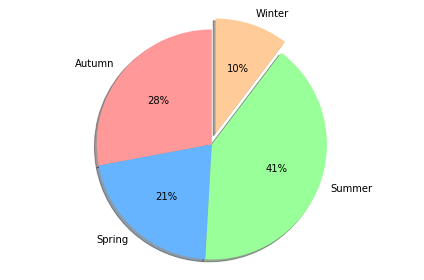

In [7]:
# Pie chart
labels = ['Autumn', 'Spring', 'Summer', 'Winter']
sizes = [910405, 689595, 1322515, 336281]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0, 0, 0.1)
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

## For Days of the week

In [8]:
data['day_of_week'].value_counts()

Tuesday      529641
Wednesday    527461
Thursday     524395
Friday       500570
Monday       495981
Saturday     363238
Sunday       317510
Name: day_of_week, dtype: int64

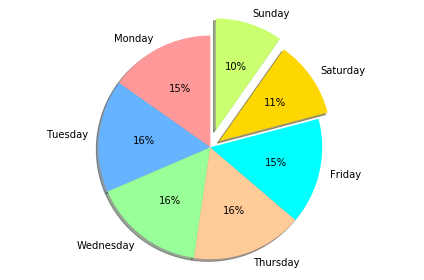

In [40]:
# Pie chart
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sizes = [495981, 529641, 527461, 524395, 500570, 363238, 317510]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0, 0, 0, 0, 0.1, 0.16)
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#00ffff', '#ffd700', '#caff70']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

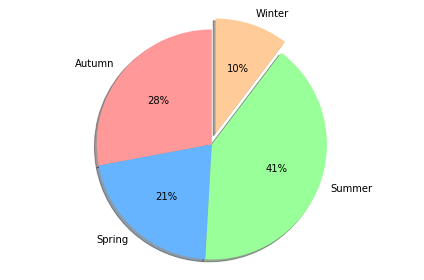

In [11]:
dat = data.groupby(['Season']).size().reset_index(name="Count")

# Pie chart
labels = dat['Season'].tolist()  #['Autumn', 'Spring', 'Summer', 'Winter']
sizes = dat['Count'].tolist()  #[910405, 689595, 1322515, 336281]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0, 0, 0.1)
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [17]:
dataF = data[data["gender"] == "Female"]
dataF.head()

,trip_id,start_time,month,month_numb,day_of_week,hour,quarter,Season,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,birthyear_bins,start_date
1,21742444,2019-01-01 00:08:13,January,1,Tuesday,0,1,Winter,2019-01-01 00:15:34,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990,young,2019-01-01
2,21742445,2019-01-01 00:13:23,January,1,Tuesday,0,1,Winter,2019-01-01 00:27:12,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994,very_young,2019-01-01
5,21742448,2019-01-01 00:15:33,January,1,Tuesday,0,1,Winter,2019-01-01 00:19:09,2437,216,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983,young,2019-01-01
11,21742454,2019-01-01 00:21:52,January,1,Tuesday,0,1,Winter,2019-01-01 00:32:45,6300,653,204,Prairie Ave & Garfield Blvd,420,Ellis Ave & 55th St,Subscriber,Female,1994,very_young,2019-01-01
13,21742456,2019-01-01 00:23:43,January,1,Tuesday,0,1,Winter,2019-01-01 00:33:05,84,562,90,Millennium Park,255,Indiana Ave & Roosevelt Rd,Customer,Female,1990,young,2019-01-01


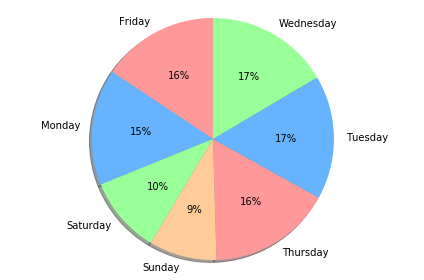

In [18]:
#Filter by Gender
dataF = data[data["gender"] == "Male"]

dat = dataF.groupby(['day_of_week']).size().reset_index(name="Count")

# Pie chart
labels = dat['day_of_week'].tolist()  #['Autumn', 'Spring', 'Summer', 'Winter']
sizes = dat['Count'].tolist()  #[910405, 689595, 1322515, 336281]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0, 0, 0, 0, 0, 0)
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [9]:
data['tripduration'].describe()

count    3.258796e+06
mean     7.813072e+02
std      1.383022e+04
min      1.000000e+00
25%      1.940000e+02
50%      4.590000e+02
75%      8.420000e+02
max      6.951586e+06
Name: tripduration, dtype: float64

In [11]:
from numpy import median

median(data['tripduration'])

459.0

In [16]:
dataG= data.loc[(data["day_of_week"] != "Sunday") | (data["day_of_week"] != "Saturday" )]
dataG['tripduration'].describe()

count    3.258796e+06
mean     7.813072e+02
std      1.383022e+04
min      1.000000e+00
25%      1.940000e+02
50%      4.590000e+02
75%      8.420000e+02
max      6.951586e+06
Name: tripduration, dtype: float64

In [17]:
dataG= data.loc[(data["day_of_week"] == "Sunday") | (data["day_of_week"] == "Saturday" )]
dataG['tripduration'].describe()

count    6.807480e+05
mean     9.623107e+02
std      1.169069e+04
min      1.000000e+00
25%      2.140000e+02
50%      5.210000e+02
75%      1.121000e+03
max      6.629854e+06
Name: tripduration, dtype: float64

In [14]:
df_time_rent = data.groupby(['tripduration','day_of_week']).size().reset_index(name="Count")
df_time_rent

,tripduration,day_of_week,Count
0,1,Friday,314
1,1,Monday,308
2,1,Saturday,212
3,1,Sunday,187
4,1,Thursday,304
...,...,...,...
41618,5628778,Wednesday,1
41619,5937966,Wednesday,1
41620,6165373,Friday,1
41621,6629854,Sunday,1


In [13]:
df_time_rent.describe()

,tripduration,Count
count,4.162300e+04,41623.000000
mean,1.198814e+04,78.293155
std,1.217078e+05,176.172000
min,1.000000e+00,1.000000
25%,1.932000e+03,1.000000
50%,3.991000e+03,3.000000
75%,6.783000e+03,45.000000
max,6.951586e+06,1357.000000


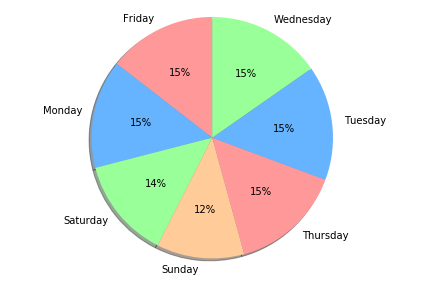

In [19]:
#Filter by Gender
dataF = data[data["gender"] == "Female"]

dat = dataF.groupby(['day_of_week']).size().reset_index(name="Count")

# Pie chart
labels = dat['day_of_week'].tolist()  #['Autumn', 'Spring', 'Summer', 'Winter']
sizes = dat['Count'].tolist()  #[910405, 689595, 1322515, 336281]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0, 0, 0, 0, 0, 0)
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [8]:
data.groupby(['bikeid']).size().reset_index(name="Count")

,bikeid,Count
0,1,431
1,2,287
2,3,601
3,4,721
4,5,278
...,...,...
6006,6929,109
6007,6931,85
6008,6941,16
6009,6942,97


## For gender

In [83]:
data['gender'].value_counts()

Male      2400819
Female     857977
Name: gender, dtype: int64

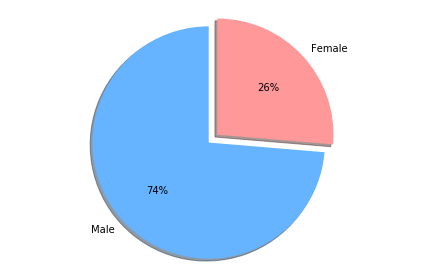

In [114]:
# Pie chart
labels = ['Male', 'Female']
sizes = [2400819, 857977]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1)
#add colors
colors = ['#66b3ff', '#ff9999']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

## Per usertype

In [80]:
data['usertype'].value_counts()

Subscriber    2914616
Customer       344180
Name: usertype, dtype: int64

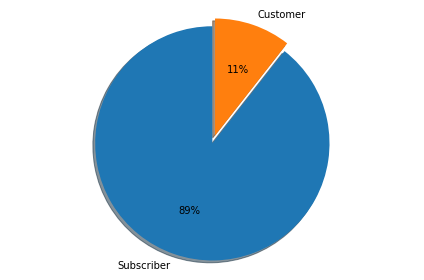

In [115]:
# Pie chart
labels = ['Subscriber', 'Customer']
sizes = [2914616, 344180]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.07)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

## Pie chart for birthyear bins

In [20]:
data['birthyear_bins'].value_counts

<bound method IndexOpsMixin.value_counts of 0               young
1               young
2          very_young
3          very_young
4          very_young
              ...    
3817999         young
3818000    very_young
3818001    middle_age
3818002         young
3818003         young
Name: birthyear_bins, Length: 3258796, dtype: category
Categories (4, object): [old < middle_age < young < very_young]>

In [21]:
data['age'] = (2019 - data['birthyear']).astype('<m8[Y]') 
data['age'].value_counts()

27.0    203353
30.0    190338
26.0    186823
29.0    184083
28.0    180340
         ...  
82.0         4
84.0         2
94.0         2
83.0         1
99.0         1
Name: age, Length: 78, dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3258796 entries, 0 to 3818003
Data columns (total 21 columns):
 #   Column             Dtype         
---  ------             -----         
 0   trip_id            int64         
 1   start_time         datetime64[ns]
 2   month              object        
 3   month_numb         int64         
 4   day_of_week        object        
 5   hour               int64         
 6   quarter            int64         
 7   Season             object        
 8   end_time           datetime64[ns]
 9   bikeid             int64         
 10  tripduration       int64         
 11  from_station_id    int64         
 12  from_station_name  object        
 13  to_station_id      int64         
 14  to_station_name    object        
 15  usertype           object        
 16  gender             object        
 17  birthyear          Int64         
 18  birthyear_bins     category      
 19  start_date         object        
 20  age                float

In [23]:
data['age'] = data['age'].astype(int)
data.head(2)

,trip_id,start_time,month,month_numb,day_of_week,hour,quarter,Season,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,birthyear_bins,start_date,age
0,21742443,2019-01-01 00:04:37,January,1,Tuesday,0,1,Winter,2019-01-01 00:11:07,2167,39,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989,young,2019-01-01,30
1,21742444,2019-01-01 00:08:13,January,1,Tuesday,0,1,Winter,2019-01-01 00:15:34,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990,young,2019-01-01,29


In [24]:
#data['birthyear_bins']=pd.cut(data['birthyear'], bins=4, labels=('old','middle_age','young','very_young'))
data['age_bin'] = pd.cut(data['age'], [0, 19, 25, 35, 50, 65, 100], labels=['< 18 years', '18-25', '26-34', '35-50', '51-65', '> 65 years'])
data.head()

,trip_id,start_time,month,month_numb,day_of_week,hour,quarter,Season,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,birthyear_bins,start_date,age,age_bin
0,21742443,2019-01-01 00:04:37,January,1,Tuesday,0,1,Winter,2019-01-01 00:11:07,2167,39,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989,young,2019-01-01,30,26-34
1,21742444,2019-01-01 00:08:13,January,1,Tuesday,0,1,Winter,2019-01-01 00:15:34,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990,young,2019-01-01,29,26-34
2,21742445,2019-01-01 00:13:23,January,1,Tuesday,0,1,Winter,2019-01-01 00:27:12,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994,very_young,2019-01-01,25,18-25
3,21742446,2019-01-01 00:13:45,January,1,Tuesday,0,1,Winter,2019-01-01 00:43:28,252,1783,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993,very_young,2019-01-01,26,26-34
4,21742447,2019-01-01 00:14:52,January,1,Tuesday,0,1,Winter,2019-01-01 00:20:56,1170,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994,very_young,2019-01-01,25,18-25


In [29]:
data['age_bin'].value_counts()

26-34         1581663
35-50          777793
18-25          489289
51-65          346449
> 65 years      33404
< 18 years      30198
Name: age_bin, dtype: int64

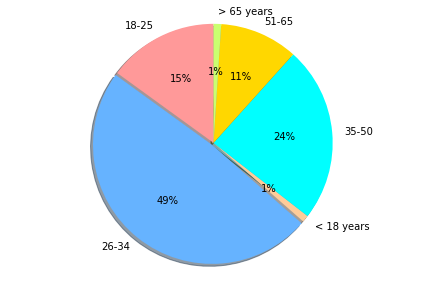

In [36]:
labels = ['18-25','26-34','< 18 years', '35-50', '51-65', '> 65 years']
sizes = [489289, 1581663,30198, 777793, 346449, 33404]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.02, 0, 0, 0, 0)
#add colors
colors = ['#ff9999','#66b3ff','#ffcc99','#00ffff', '#ffd700', '#caff70']
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

## I. Using bioinfokit to run the tests

In [141]:
! pip install bioinfokit

In [142]:
from bioinfokit.analysis import stat

ModuleNotFoundError: No module named 'bioinfokit.analysis'

## 1. Comparing bike rented by males and females within a week

### a. Anova

In [122]:
df_gend = data.groupby(["day_of_week", "gender"]).size().reset_index(name="Count")
print(df_gend.shape)
df_gend.head(3)

(14, 3)


,day_of_week,gender,Count
0,Friday,Female,124483
1,Friday,Male,376087
2,Monday,Female,124506


In [124]:
model = ols('Count ~ gender', data=df_gend).fit()
aov_res = sm.stats.anova_lm(model, typ=2)
aov_res

,sum_sq,df,F,PR(>F)
gender,1.700258e+11,1.0,56.280854,0.000007
Residual,3.625229e+10,12.0,NaN,NaN


### b. T-test

In [125]:
male = df_gend[df_gend['gender'] == 'Male']
female = df_gend[df_gend['gender'] == 'Female']
t, p = stats.ttest_ind(male['Count'], female['Count'])
print(f't-value: {t}')
print(f'p-value: {p}')

t-value: 7.502056638640463
p-value: 7.213790492888334e-06


## 2. Day of the week vs usertype

### a. Anova

In [126]:
df_day_users = data.groupby(["day_of_week", "usertype"]).size().reset_index(name="Count")
print(df_day_users.shape)
df_day_users.head(3)

(14, 3)


,day_of_week,usertype,Count
0,Friday,Customer,47117
1,Friday,Subscriber,453453
2,Monday,Customer,40665


In [127]:
model = ols('Count ~ usertype', data=df_day_users).fit()
aov_res = sm.stats.anova_lm(model, typ=2)
aov_res

,sum_sq,df,F,PR(>F)
usertype,4.719387e+11,1.0,88.415262,6.936028e-07
Residual,6.405301e+10,12.0,NaN,NaN


### b. T-test

In [128]:
subscribers = df_day_users[df_users['usertype'] == 'Subscriber']
customers = df_day_users[df_users['usertype'] == 'Customer']
t, p = stats.ttest_ind(subscribers['Count'], customers['Count'])
print(f't-value: {t}')
print(f'p-value: {p}')

t-value: 9.40293900611628
p-value: 6.936028359114128e-07


## 3. Finding if subscribers and customers rent equally and if it varies through different seasons

### a. Anova

In [130]:
df_seas_users = data.groupby(["Season", "usertype"]).size().reset_index(name="Count")
print(df_seas_users.shape)
df_seas_users.head(3)

(8, 3)


,Season,usertype,Count
0,Autumn,Customer,94003
1,Autumn,Subscriber,816402
2,Spring,Customer,40842


In [133]:
model = ols('Count ~ usertype', data=df_seas_users).fit()
aov_res = sm.stats.anova_lm(model, typ=2)
aov_res

,sum_sq,df,F,PR(>F)
usertype,8.258927e+11,1.0,14.156555,0.009371
Residual,3.500397e+11,6.0,NaN,NaN


### b. T-test

In [134]:
subscribers = df_seas_users[df_users['usertype'] == 'Subscriber']
customers = df_seas_users[df_users['usertype'] == 'Customer']
t, p = stats.ttest_ind(subscribers['Count'], customers['Count'])
print(f't-value: {t}')
print(f'p-value: {p}')

t-value: 3.762519717702639
p-value: 0.009370724607398328


## 4. Finding if male and female rent equally and if it varies through different seasons

### a. Anova

In [135]:
df_seas_gend = data.groupby(["Season", "gender"]).size().reset_index(name="Count")
print(df_seas_gend.shape)
df_seas_gend.head(3)

(8, 3)


,Season,gender,Count
0,Autumn,Female,237585
1,Autumn,Male,672820
2,Spring,Female,166047


In [137]:
model = ols('Count ~ gender', data=df_seas_gend).fit()
aov_res = sm.stats.anova_lm(model, typ=2)
aov_res

,sum_sq,df,F,PR(>F)
gender,2.975452e+11,1.0,6.230784,0.046771
Residual,2.865243e+11,6.0,NaN,NaN


### b. T-test

In [153]:
male = df_seas_gend[df_gend['gender'] == 'Male']
female = df_seas_gend[df_gend['gender'] == 'Female']
t, p = stats.ttest_ind(male['Count'], female['Count'])
print(f't-value: {t}')
print(f'p-value: {p}')

t-value: 2.4961538927276186
p-value: 0.046771001584474746


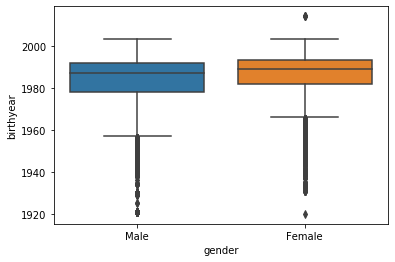

In [37]:
df = pd.DataFrame(data[['birthyear','gender']])

sns.boxplot(x="gender", y="birthyear", data=df)
plt.show()

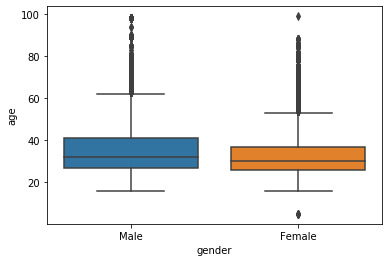

In [39]:
df = pd.DataFrame(data[['age','gender']])

sns.boxplot(x="gender", y="age", data=df)
plt.show()